In [182]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import Normalizer, PowerTransformer, MinMaxScaler, StandardScaler

In [183]:
# Numpy random object
rng = np.random.default_rng()
n_samples = 1000
n_features = 2

# Original array of shape (n_samples, n_features)
X = rng.poisson(5.0, size=(n_samples, n_features)).astype(np.float64)
X[:, 1] = X[:, 1] * rng.integers(10000, size=n_samples)

# Test set of shape (n_samples // 2, n_features)
X_test = rng.poisson(5.0, size=(n_samples // 2, n_features)).astype(np.float64)
X_test[:, 1] = X_test[:, 1] * rng.integers(10000, size=n_samples// 2)

In [184]:
# Manual normalization of original data?
X_manual = X.copy()
X_manual[:, 0] = np.true_divide(X_manual[:, 0] - np.mean(X_manual[:, 0]), np.std(X_manual[:, 0]))
X_manual[:, 1] = np.true_divide(X_manual[:, 1] - np.mean(X_manual[:, 1]), np.std(X_manual[:, 1]))

In [185]:
norm = Normalizer()
power = PowerTransformer(method="yeo-johnson")
minmax = MinMaxScaler()
standard = StandardScaler()

X_norm = norm.fit_transform(X)
X_power = power.fit_transform(X)
X_minmax = minmax.fit_transform(X)
X_standard = standard.fit_transform(X)

X_test_norm = norm.transform(X_test)
X_test_power = power.transform(X_test)
X_test_minmax = minmax.transform(X_test)
X_test_standard = standard.transform(X_test)

# Visualize

In [186]:
def plot_hist(data):
    n_features = data.shape[1]
    fig, axes = plt.subplots(ncols=n_features, figsize=(10, 2 * n_features))
    for i in range(n_features):
        sns.histplot(data[:, i], ax=axes[i])

## Original data

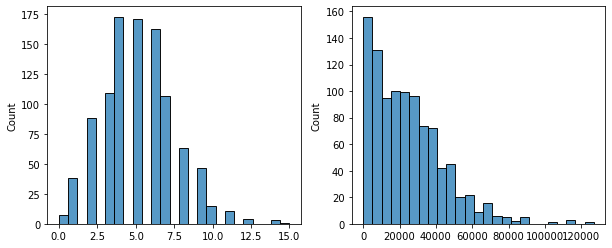

In [187]:
plot_hist(X)

## Transformed data

### Train set

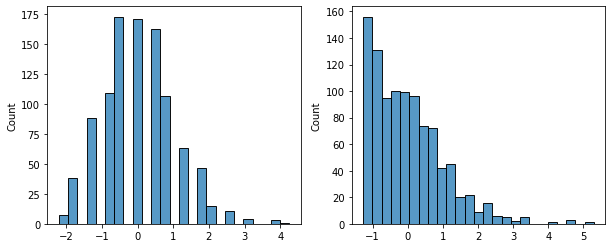

In [188]:
plot_hist(X_manual)

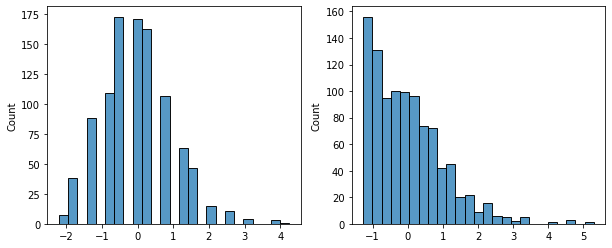

In [189]:
plot_hist(X_standard)

<AxesSubplot:>

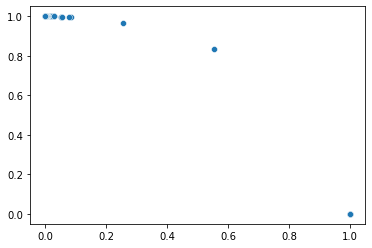

In [190]:
sns.scatterplot(x=X_norm[:,0], y=X_norm[:,1])

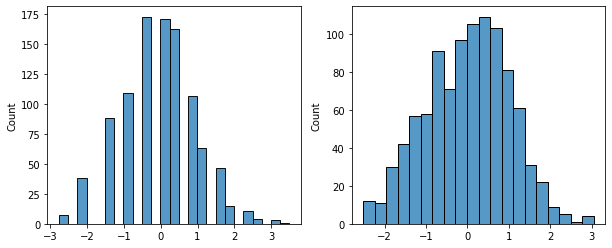

In [191]:
plot_hist(X_power)

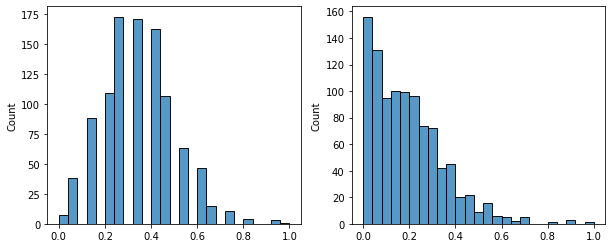

In [192]:
plot_hist(X_minmax)

## Test set

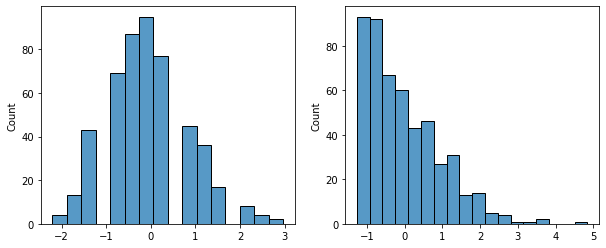

In [193]:
plot_hist(X_test_standard)

<AxesSubplot:>

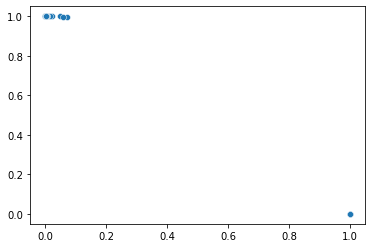

In [194]:
sns.scatterplot(x=X_test_norm[:,0], y=X_test_norm[:,1])

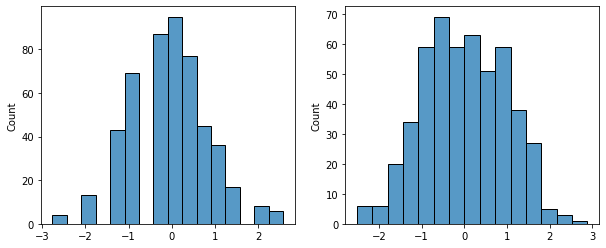

In [195]:
plot_hist(X_test_power)

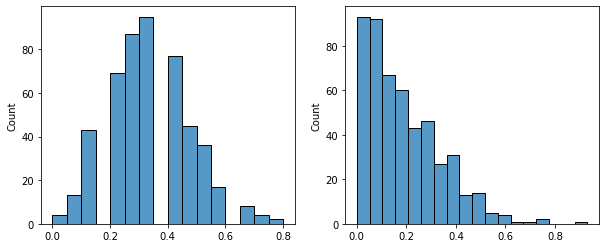

In [196]:
plot_hist(X_test_minmax)